In [1]:
!sudo apt-get update
!apt-cache search libgl
!sudo apt-get install libgl1-mesa-glx -y

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy InRelease [270 kB]
Get:3 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2788 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy/main amd64 Packages [1792 kB]
Get:7 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [4000 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy/universe amd64 Packages [17.5 MB] 
Get:9 http://security.ubuntu.com/ubuntu jammy-security/multiverse amd64 Packages [47.7 kB]
Get:10 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1243 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy/restricted amd64 Packages [164 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy/multiverse amd64 Packages [266 kB]
Get:13 http://archive.ubuntu.com/ubuntu ja

libglobus-common-dev - Grid Community Toolkit - Common Library Development Files
libglobus-common-doc - Grid Community Toolkit - Common Library Documentation Files
libglobus-common0 - Grid Community Toolkit - Common Library
libglobus-ftp-client-dev - Grid Community Toolkit - GridFTP Client Library Development Files
libglobus-ftp-client-doc - Grid Community Toolkit - GridFTP Client Library Documentation Files
libglobus-ftp-client2 - Grid Community Toolkit - GridFTP Client Library
libglobus-ftp-control-dev - Grid Community Toolkit - GridFTP Control Library Development Files
libglobus-ftp-control-doc - Grid Community Toolkit - GridFTP Control Library Documentation Files
libglobus-ftp-control1 - Grid Community Toolkit - GridFTP Control Library
libglobus-gass-cache-dev - Grid Community Toolkit - Globus Gass Cache Development Files
libglobus-gass-cache-doc - Grid Community Toolkit - Globus Gass Cache Documentation Files
libglobus-gass-cache5 - Grid Community Toolkit - Globus Gass Cache
libgl

libglobus-xio-gsi-driver-dev - Grid Community Toolkit - Globus XIO GSI Driver Development Files
libglobus-xio-gsi-driver-doc - Grid Community Toolkit - Globus XIO GSI Driver Documentation Files
libglobus-xio-net-manager-driver - Grid Community Toolkit - Globus XIO Network Manager Driver
libglobus-xio-net-manager-driver-dev - Grid Community Toolkit - Globus XIO Network Manager Driver Development Files
libglobus-xio-pipe-driver - Grid Community Toolkit - Globus Pipe Driver
libglobus-xio-pipe-driver-dev - Grid Community Toolkit - Globus Pipe Driver Development Files
libglobus-xio-popen-driver - Grid Community Toolkit - Globus XIO Pipe Open Driver
libglobus-xio-popen-driver-dev - Grid Community Toolkit - Globus XIO Pipe Open Driver Development Files
libglobus-xio-rate-driver - Grid Community Toolkit - Globus XIO Rate Limiting Driver
libglobus-xio-rate-driver-dev - Grid Community Toolkit - Globus XIO Rate Limiting Driver Development Files
libglobus-xio-udt-driver - Grid Community Toolkit - 

Extracting templates from packages: 100%
Selecting previously unselected package libelf1:amd64.
(Reading database ... 28089 files and directories currently installed.)
Preparing to unpack .../00-libelf1_0.186-1ubuntu0.1_amd64.deb ...
Unpacking libelf1:amd64 (0.186-1ubuntu0.1) ...
Selecting previously unselected package libicu70:amd64.
Preparing to unpack .../01-libicu70_70.1-2_amd64.deb ...
Unpacking libicu70:amd64 (70.1-2) ...
Selecting previously unselected package libxml2:amd64.
Preparing to unpack .../02-libxml2_2.9.13+dfsg-1ubuntu0.6_amd64.deb ...
Unpacking libxml2:amd64 (2.9.13+dfsg-1ubuntu0.6) ...
Selecting previously unselected package libdrm-common.
Preparing to unpack .../03-libdrm-common_2.4.113-2~ubuntu0.22.04.1_all.deb ...
Unpacking libdrm-common (2.4.113-2~ubuntu0.22.04.1) ...
Selecting previously unselected package libdrm2:amd64.
Preparing to unpack .../04-libdrm2_2.4.113-2~ubuntu0.22.04.1_amd64.deb ...
Unpacking libdrm2:amd64 (2.4.113-2~ubuntu0.22.04.1) ...
Selecting pr

In [2]:
# basic
import time
import math
import warnings
warnings.filterwarnings('ignore')

import os
import random
import itertools
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from collections import Counter, defaultdict
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import jaccard_score, accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from skmultilearn.model_selection import iterative_train_test_split

# PyTorch
import torch
import timm
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torch_pruning as tp
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torch.utils.data import Dataset, DataLoader

# visualization
from PIL import Image
import matplotlib.pyplot as plt

# cka
#from torch_cka import CKA
from tqdm import tqdm
from functools import partial
from warnings import warn
from typing import List, Dict

In [3]:
class config:
    
    root = "/home/ttban9527/vinbigdata/train"
    num_classes = 14
    batch_size = 32
    epochs = 20
    weight_decay = 1e-5
    lr = 1e-4
    momentum = 0.9
    gamma = 0.5
    seed = 42

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
def seed_everything(seed):
    # Set Python random seed
    random.seed(seed)
    
    # Set NumPy random seed
    np.random.seed(seed)
    
    # Set PyTorch random seed for CPU and GPU
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)
    
    # Set PyTorch deterministic operations for cudnn backend
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

class_id
14    10606
0      3067
3      2300
11     1981
13     1617
7      1322
9      1134
10     1032
8       826
6       613
2       452
5       386
4       353
1       186
12       96
Name: count, dtype: int64
25971


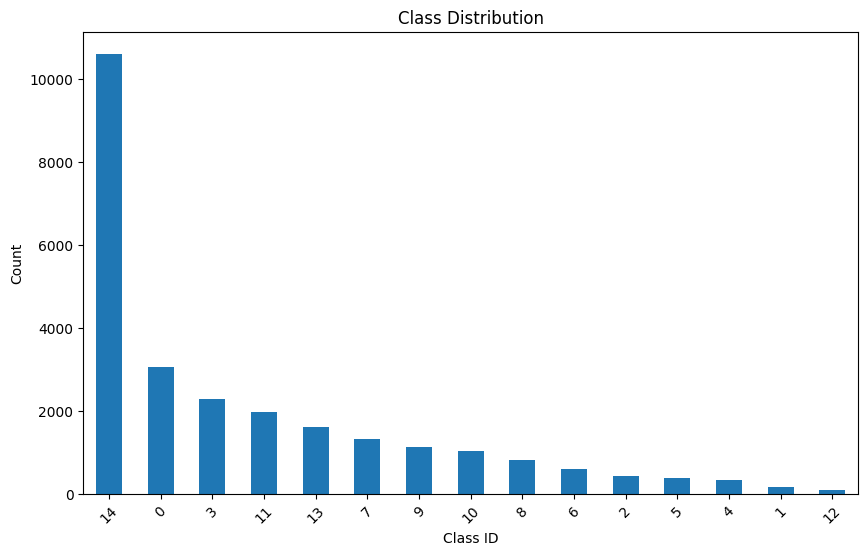

In [5]:
def read_csv():
    df = pd.read_csv("/home/ttban9527/vinbigdata/train.csv")
    train_df = df.groupby(['image_id', 'class_id']).first().reset_index()
    return train_df

train_df = read_csv()
class_distribution = train_df['class_id'].value_counts()
print(class_distribution)
print(train_df.shape[0])

# 繪製長條圖
plt.figure(figsize=(10, 6))
class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class ID')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [6]:
def merged_df(df):
    merged_df = df.groupby('image_id')['class_id'].apply(lambda x: np.unique(x)).reset_index()

    # 將 class_id 轉換為數字類型，並排序
    label_names = sorted(df['class_id'].unique())

    # 將排序後的數字類型轉換為字串類型
    label_names = [str(class_id) for class_id in label_names]

    label_columns = [str(label) for label in label_names]  # 將 class_id 轉換為字符串形式
    label_data = np.zeros((len(merged_df), len(label_columns)))
    label_df = pd.DataFrame(label_data, columns=label_columns)

    # 將合併後的 class_id 列轉換為多標籤形式並填充到新的 DataFrame 中
    for i, labels in enumerate(merged_df['class_id']):
        label_df.loc[i, [str(label) for label in labels]] = 1

    # 將新的 DataFrame 連接到 merged_df 中
    merged_df = pd.concat([merged_df, label_df], axis=1)

    # 最後，移除原始的 class_id 列
    merged_df.drop(columns=['class_id'], inplace=True)
    merged_df = merged_df.drop(columns=['14'])

    return merged_df

# 畫出15種類別的第一張 image 位置

import cv2
temp = train_df[train_df["class_id"].duplicated() == False]
rows, cols = 3, 5
fig = plt.figure(figsize=(16, 16))
    
for i in range(rows * cols):
    filename = "/" + temp.iloc[i, 0] + ".png"
    image_path = config.root + filename
    img = Image.open(image_path)
        
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.imshow(img)
        
plt.show()

import torch
from torchvision import transforms
from PIL import Image

image_path = "/home/ttban9527/vinbigdata/train/000ae00eb3942d27e0b97903dd563a6e.png"
image = Image.open(image_path)

# 轉張量
transform = transforms.ToTensor()
image_tensor = transform(image)

# 是否灰階
if image_tensor.shape[0] == 1:
    print("圖片為灰階")
else:
    print("圖片不是灰階，它有", image_tensor.shape[0], "個通道")

# 獲取pixel的最大值和最小值
max_pixel_value = torch.max(image_tensor)
min_pixel_value = torch.min(image_tensor)

print("pixel的最大值:", max_pixel_value.item())
print("pixel的最小值:", min_pixel_value.item())
print(image_tensor)

# Transform

In [7]:
def get_transforms(train=False):
    
    if train:
        transform = A.Compose([
            A.Resize(224, 224),
            A.HorizontalFlip(p=0.3),
            A.Normalize(mean=[0.5488, 0.5488, 0.5488], std=[0.2495, 0.2495, 0.2495]),
            ToTensorV2()
        ], additional_targets={'image': 'image'})
    else:
        transform = A.Compose([
            A.Resize(224, 224),
            A.Normalize(mean=[0.5488, 0.5488, 0.5488], std=[0.2495, 0.2495, 0.2495]),
            ToTensorV2()
        ], additional_targets={'image': 'image'})
    
    return transform

def get_advtransforms(train=False):
    
    if train:
        transform = A.Compose([
            A.Resize(224, 224),
            A.HorizontalFlip(p=0.3),
            ToTensorV2()
        ], additional_targets={'image': 'image'})
    else:
        transform = A.Compose([
            A.Resize(224, 224),
            ToTensorV2()
        ], additional_targets={'image': 'image'})
    
    return transform

# ResNet50

In [8]:
from torchsummary import summary
model = torchvision.models.resnet50(weights='IMAGENET1K_V1', progress = True)
model.fc = nn.Linear(2048, 14)
model.to(config.device)
summary(model, (3,224,224))
del model

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

# DeiT

In [9]:
model = timm.create_model('deit3_small_patch16_224_in21ft1k', pretrained=True)
model.head = nn.Linear(384, 14)
model.to(config.device)
summary(model, (3,224,224))
del model

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 384, 14, 14]         295,296
          Identity-2             [-1, 196, 384]               0
        PatchEmbed-3             [-1, 196, 384]               0
           Dropout-4             [-1, 197, 384]               0
          Identity-5             [-1, 197, 384]               0
          Identity-6             [-1, 197, 384]               0
         LayerNorm-7             [-1, 197, 384]             768
            Linear-8            [-1, 197, 1152]         443,520
          Identity-9           [-1, 6, 197, 64]               0
         Identity-10           [-1, 6, 197, 64]               0
           Linear-11             [-1, 197, 384]         147,840
          Dropout-12             [-1, 197, 384]               0
        Attention-13             [-1, 197, 384]               0
       LayerScale-14             [-1, 1

# Iterative train test split

In [10]:
def data_split(train_df, train_ratio, valid_ratio, test_ratio):
    assert train_ratio + valid_ratio + test_ratio == 1, "分配比例之和必須等於 1"
    
    seed_everything(config.seed)
    binarizer = MultiLabelBinarizer()
    disease_id = []

    # 構建每個圖像對應的疾病類別列表
    for image_id in train_df.image_id.unique():
        diseases = []
        temp = train_df[train_df["image_id"] == image_id]
        diseases.extend(list(temp["class_id"]))
        disease_id.append(diseases)

    # 將疾病類別進行 one-hot 編碼
    one_hot = binarizer.fit_transform(disease_id)
    
    # 第一步：劃分為訓練集和剩餘部分
    train_size = train_ratio
    remaining_size = 1 - train_size
    
    train_ID, train_label, remaining_ID, remaining_label = iterative_train_test_split(
        np.expand_dims(train_df["image_id"].unique(), axis=1),
        one_hot,
        test_size=remaining_size
    )
    
    # 第二步：劃分剩餘部分為驗證集和測試集
    valid_size = valid_ratio / (valid_ratio + test_ratio)  # 調整比例
    val_ID, val_label, test_ID, test_label = iterative_train_test_split(
        remaining_ID,
        remaining_label,
        test_size=(1 - valid_size)
    )
    
    # 構建訓練、驗證和測試數據集
    training = train_df[train_df["image_id"].isin(train_ID.ravel())]
    validation = train_df[train_df["image_id"].isin(val_ID.ravel())]
    testing = train_df[train_df["image_id"].isin(test_ID.ravel())]
    
    return training, validation, testing

# Training

In [11]:
class CustomDataset(Dataset):
    def __init__(self, root, df, transform=None):
        self.root = config.root
        self.data = df
        self.transform = transform
        self.device = config.device
        self.labels = df.iloc[:, 1:].values.astype(int)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        targets = self.labels[idx]
        targets = torch.tensor(targets, dtype=torch.float32)
        
        filename = "/" + self.data.iloc[idx, 0] + ".png"
        image_path = self.root + filename
        image = Image.open(image_path).convert('RGB')
        image = np.array(image)
        
        if self.transform:
            transformed = self.transform(image=image)
            image = transformed['image']
        
        image = image.float()
            
        return image, targets

In [12]:
def train_one_epoch(model, train_loader, optimizer, scheduler, device, criterion):
    
    model.train()
    train_loss = []
    train_preds = []
    train_targets = []
    
    for images, targets in tqdm(train_loader):
        images = images.to(device).float()
        targets = targets.to(device).float()
        
        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, targets)
        total_loss = loss.item()
        train_loss.append(total_loss)
        
        predicted = torch.round(torch.sigmoid(outputs))
        train_preds.extend(predicted.cpu().tolist())
        train_targets.extend(targets.cpu().tolist())
        
        loss.backward()
        optimizer.step()
        
    scheduler.step()
        
    train_loss = sum(train_loss) / len(train_loss)
    
    return train_loss, train_preds, train_targets

# Validation

In [13]:
@torch.no_grad()
def validation(model, val_loader, device, criterion):
    
    model.eval()
    val_loss = []
    val_preds = []
    val_targets = []

    for images, targets in tqdm(val_loader):
        images = images.to(device).float()
        targets = targets.to(device).float()
        
        outputs = model(images)
        loss = criterion(outputs, targets)
        total_loss = loss.item()
        val_loss.append(total_loss)
        
        predicted = torch.round(torch.sigmoid(outputs))
        val_preds.extend(predicted.cpu().tolist())
        val_targets.extend(targets.cpu().tolist())
    
    val_loss = sum(val_loss) / len(val_loss)
    
    return val_loss, val_preds, val_targets

# Testing

In [14]:
def testing(model, test_loader, device):
    model.eval()
    test_probs = []  # 儲存機率分數
    test_preds = []  # 儲存 0/1 預測結果
    test_targets = []

    for images, targets in tqdm(test_loader):
        images = images.to(device).float()
        targets = targets.to(device).float()
        
        outputs = model(images)
        probs = torch.sigmoid(outputs)  # **取得機率**
        predicted = torch.round(probs)  # **轉為 0/1**

        test_probs.extend(probs.cpu().tolist())  # 儲存機率
        test_preds.extend(predicted.cpu().tolist())  # 儲存 0/1 預測
        test_targets.extend(targets.cpu().tolist())

    return test_probs, test_preds, test_targets

# Evaluator

In [15]:
def evaluator(preds, targets):
    preds = np.array(preds).astype(int)
    targets = np.array(targets).astype(int)

    # 確認 preds.shape[1] 來自你的標籤數量
    num_labels = preds.shape[1]
    label_names = [str(i) for i in range(num_labels)]

    acc = accuracy_score(targets, preds)  # accuracy_score 仍適用
    precision = precision_score(targets, preds, average="samples", zero_division=0)
    recall = recall_score(targets, preds, average="samples", zero_division=0)
    f1 = f1_score(targets, preds, average="samples", zero_division=0)
    jaccard = jaccard_score(targets, preds, average="samples")

    report = classification_report(targets, preds, target_names=label_names, zero_division=0)

    return acc, precision, recall, f1, report, jaccard

In [16]:
def AUROC(preds, targets):
    preds = np.array(preds)
    targets = np.array(targets)
    
    n_classes = preds.shape[1]
    roc_auc_values = []
    
    # **忽略 class 14 (no finding)**
    for i in range(n_classes):  # 只計算前 14 類別
        if np.sum(targets[:, i]) == 0:  # 避免某類別完全沒有樣本，導致 roc_auc_score 出錯
            continue
        
        roc_auc = roc_auc_score(targets[:, i], preds[:, i])
        roc_auc_values.append(roc_auc)

        fpr, tpr, _ = roc_curve(targets[:, i], preds[:, i])
        plt.plot(fpr, tpr, lw=2, label=f'ROC curve of class {i} (area = {roc_auc:.2f})')
    
    # **計算平均 AUROC**
    mean_auc = np.mean(roc_auc_values) if roc_auc_values else 0.0

    # **繪製 ROC 曲線**
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) for multi-label classification')
    plt.legend(loc="lower right")
    plt.show()
    
    return mean_auc

# CKA

In [17]:
from mpl_toolkits import axes_grid1
import matplotlib.pyplot as plt

def add_colorbar(im, aspect=10, pad_fraction=0.5, **kwargs):
    """Add a vertical color bar to an image plot."""
    divider = axes_grid1.make_axes_locatable(im.axes)
    width = axes_grid1.axes_size.AxesY(im.axes, aspect=1./aspect)
    pad = axes_grid1.axes_size.Fraction(pad_fraction, width)
    current_ax = plt.gca()
    cax = divider.append_axes("right", size=width, pad=pad)
    plt.sca(current_ax)
    return im.axes.figure.colorbar(im, cax=cax, **kwargs)

class CKA:
    def __init__(self,
                 model1: nn.Module,
                 model2: nn.Module,
                 model1_name: str = None,
                 model2_name: str = None,
                 model1_layers: List[str] = None,
                 model2_layers: List[str] = None,
                 device: str ='cpu'):
        """

        :param model1: (nn.Module) Neural Network 1
        :param model2: (nn.Module) Neural Network 2
        :param model1_name: (str) Name of model 1
        :param model2_name: (str) Name of model 2
        :param model1_layers: (List) List of layers to extract features from
        :param model2_layers: (List) List of layers to extract features from
        :param device: Device to run the model
        """

        self.model1 = model1
        self.model2 = model2

        self.device = device
        
        # Initialize K and L matrices to None
        self.K_matrices = None
        self.L_matrices = None

        self.model1_info = {}
        self.model2_info = {}

        if model1_name is None:
            self.model1_info['Name'] = model1.__repr__().split('(')[0]
        else:
            self.model1_info['Name'] = model1_name

        if model2_name is None:
            self.model2_info['Name'] = model2.__repr__().split('(')[0]
        else:
            self.model2_info['Name'] = model2_name

        if self.model1_info['Name'] == self.model2_info['Name']:
            warn(f"Both model have identical names - {self.model2_info['Name']}. " \
                 "It may cause confusion when interpreting the results. " \
                 "Consider giving unique names to the models :)")

        self.model1_info['Layers'] = []
        self.model2_info['Layers'] = []

        self.model1_features = {}
        self.model2_features = {}

        if len(list(model1.modules())) > 150 and model1_layers is None:
            warn("Model 1 seems to have a lot of layers. " \
                 "Consider giving a list of layers whose features you are concerned with " \
                 "through the 'model1_layers' parameter. Your CPU/GPU will thank you :)")

        self.model1_layers = model1_layers

        if len(list(model2.modules())) > 150 and model2_layers is None:
            warn("Model 2 seems to have a lot of layers. " \
                 "Consider giving a list of layers whose features you are concerned with " \
                 "through the 'model2_layers' parameter. Your CPU/GPU will thank you :)")

        self.model2_layers = model2_layers

        self._insert_hooks()
        self.model1 = self.model1.to(self.device)
        self.model2 = self.model2.to(self.device)

        self.model1.eval()
        self.model2.eval()

    def _log_layer(self,
                   model: str,
                   name: str,
                   layer: nn.Module,
                   inp: torch.Tensor,
                   out: torch.Tensor):

        if model == "model1":
            self.model1_features[name] = out

        elif model == "model2":
            self.model2_features[name] = out

        else:
            raise RuntimeError("Unknown model name for _log_layer.")

    def _insert_hooks(self):
        # Model 1
        for name, layer in self.model1.named_modules():
            if self.model1_layers is not None:
                if name in self.model1_layers:
                    self.model1_info['Layers'] += [name]
                    layer.register_forward_hook(partial(self._log_layer, "model1", name))
            else:
                self.model1_info['Layers'] += [name]
                layer.register_forward_hook(partial(self._log_layer, "model1", name))

        # Model 2
        for name, layer in self.model2.named_modules():
            if self.model2_layers is not None:
                if name in self.model2_layers:
                    self.model2_info['Layers'] += [name]
                    layer.register_forward_hook(partial(self._log_layer, "model2", name))
            else:

                self.model2_info['Layers'] += [name]
                layer.register_forward_hook(partial(self._log_layer, "model2", name))

    def _HSIC(self, K, L):
        """
        Computes the unbiased estimate of HSIC metric.

        Reference: https://arxiv.org/pdf/2010.15327.pdf Eq (3)
        """
        N = K.shape[0]
        ones = torch.ones(N, 1).to(self.device)
        result = torch.trace(K @ L)
        result += ((ones.t() @ K @ ones @ ones.t() @ L @ ones) / ((N - 1) * (N - 2))).item()
        result -= ((ones.t() @ K @ L @ ones) * 2 / (N - 2)).item()
        return (1 / (N * (N - 3)) * result).item()

    def compare(self,
                dataloader1: DataLoader,
                dataloader2: DataLoader = None) -> None:
        """
        Computes the feature similarity between the models on the
        given datasets.
        :param dataloader1: (DataLoader)
        :param dataloader2: (DataLoader) If given, model 2 will run on this
                            dataset. (default = None)
        """

        if dataloader2 is None:
            warn("Dataloader for Model 2 is not given. Using the same dataloader for both models.")
            dataloader2 = dataloader1

        self.model1_info['Dataset'] = dataloader1.dataset.__repr__().split('\n')[0]
        self.model2_info['Dataset'] = dataloader2.dataset.__repr__().split('\n')[0]

        N = len(self.model1_layers)
        M = len(self.model2_layers)

        self.hsic_matrix = torch.zeros(N, M, 3)

        num_batches = min(len(dataloader1), len(dataloader2))
        
        layer_names = set()

        for (x1, *_), (x2, *_) in tqdm(zip(dataloader1, dataloader2), desc="| Comparing features |", total=num_batches):

            self.model1_features = {}
            self.model2_features = {}
            _ = self.model1(x1.to(self.device))
            _ = self.model2(x2.to(self.device))

            for i, (name1, feat1) in enumerate(self.model1_features.items()):
                layer_names.add(name1)
                X = feat1.flatten(1)
                K = X @ X.t()
                K.fill_diagonal_(0.0)
                self.hsic_matrix[i, :, 0] += self._HSIC(K, K) / num_batches

                for j, (name2, feat2) in enumerate(self.model2_features.items()):
                    Y = feat2.flatten(1)
                    L = Y @ Y.t()
                    L.fill_diagonal_(0)
                    assert K.shape == L.shape, f"Feature shape mismatch! {K.shape}, {L.shape}"
                    
                    #if i == 0 and j == 78:
                    #    print(f"K: {K}")
                    #    print(f"L: {L}")
                    #elif i == 0 and j == 144:
                    #    print(f"K: {K}")
                    #    print(f"L: {L}")
                    #elif i == 0 and j == 179:
                    #    print(f"K: {K}")
                    #    print(f"L: {L}")

                    self.hsic_matrix[i, j, 1] += self._HSIC(K, L) / num_batches
                    self.hsic_matrix[i, j, 2] += self._HSIC(L, L) / num_batches
        
        hsic_KK = self.hsic_matrix[:, :, 0]
        hsic_KL = self.hsic_matrix[:, :, 1]
        hsic_LL = self.hsic_matrix[:, :, 2]
        
        self.hsic_matrix = self.hsic_matrix[:, :, 1] / (self.hsic_matrix[:, :, 0].sqrt() * self.hsic_matrix[:, :, 2].sqrt())
        
        nan_count = torch.isnan(self.hsic_matrix).sum().item()
        if nan_count > 0:
            print(f"HSIC computation resulted in {nan_count} NaNs.")
            nan_indices = torch.isnan(self.hsic_matrix).nonzero(as_tuple=True)
            for idx in zip(*nan_indices):
                i, j = idx
                print(f"NaN at layer {i}, {j} - Values before normalization:")
                print(f"Model1 Layer: {self.model1_layers[idx[0]]}, Model2 Layer: {self.model2_layers[idx[1]]}")
                print(f"hsic_KK[{i}, {j}]: {hsic_KK[i, j]}")
                print(f"hsic_KL[{i}, {j}]: {hsic_KL[i, j]}")
                print(f"hsic_LL[{i}, {j}]: {hsic_LL[i, j]}")
                
                #if i == j:
                #    print(f"Model1 Layer: {self.model1_layers[idx[0]]}, Model2 Layer: {self.model2_layers[idx[1]]}")
                #    print(f"hsic_KK[{i}, {j}]: {hsic_KK[i, j]}")
                #    print(f"hsic_KL[{i}, {j}]: {hsic_KL[i, j]}")
                #    print(f"hsic_LL[{i}, {j}]: {hsic_LL[i, j]}")
                    
                
        return layer_names
        
        #assert not torch.isnan(self.hsic_matrix).any(), "HSIC computation resulted in NANs"

    def export(self) -> Dict:
        """
        Exports the CKA data along with the respective model layer names.
        :return:
        """
        return {
            "model1_name": self.model1_info['Name'],
            "model2_name": self.model2_info['Name'],
            "CKA": self.hsic_matrix,
            "model1_layers": self.model1_info['Layers'],
            "model2_layers": self.model2_info['Layers'],
            "dataset1_name": self.model1_info['Dataset'],
            "dataset2_name": self.model2_info['Dataset'],

        }

    def plot_results(self,
                     save_path: str = None,
                     title: str = None):
        fig, ax = plt.subplots()
        im = ax.imshow(self.hsic_matrix, origin='lower', cmap='magma')
        ax.set_xlabel(f"Layers {self.model2_info['Name']}", fontsize=15)
        ax.set_ylabel(f"Layers {self.model1_info['Name']}", fontsize=15)

        if title is not None:
            ax.set_title(f"{title}", fontsize=18)
        else:
            ax.set_title(f"{self.model1_info['Name']} vs {self.model2_info['Name']}", fontsize=18)

        add_colorbar(im)
        plt.tight_layout()

        if save_path is not None:
            plt.savefig(save_path, dpi=300)

        plt.show()

In [18]:
def get_layer_names(model):
    layer_names = []
    for name, layer in model.named_modules():
        if name:  # Only append if the layer has a name
            layer_names.append(name)
    return layer_names

def get_filtered_layer_names(layer_names, keywords):
    # Filter the layer names based on whether they contain any of the keywords
    filtered_layer_names = [name for name in layer_names if any(keyword in name for keyword in keywords)]
    return filtered_layer_names

def remove_layers_with_keywords(layer_names, exclude_keywords):
    # Remove the layer names that contain any of the exclude_keywords
    return [name for name in layer_names if not any(exclude_keyword in name for exclude_keyword in exclude_keywords)]

In [19]:
def calculate_mean_std(dataset):
    all_images = []
    for img, _ in dataset:
        all_images.append(np.array(img).flatten())
    all_images = np.concatenate(all_images)
    mean = np.mean(all_images)
    std = np.std(all_images)
    return mean, std

In [20]:
seed_everything(config.seed)
device = config.device
#device = "cpu"

model1 =  torchvision.models.resnet50(weights='IMAGENET1K_V1', progress = True)
model1.fc = nn.Linear(2048, 14)

model2 = timm.create_model('deit3_small_patch16_224_in21ft1k', pretrained=True)
model2.head = nn.Linear(384, 14)

model1.to(device)
model2.to(device)

best_ckpt1 = torch.load("ResNetcheckpoint.pth", map_location = device)
best_ckpt2 = torch.load("DeiTcheckpoint.pth", map_location = device)

model1.load_state_dict(best_ckpt1["model"])
model2.load_state_dict(best_ckpt2["model"])

df = pd.read_csv("/home/ttban9527/vinbigdata/train.csv")
train_df = df.groupby(['image_id', 'class_id']).first().reset_index()
train_df = merged_df(train_df)
train_df = train_df.sample(n=500, random_state=config.seed)
train_dataset = CustomDataset(root = config.root, df=train_df, transform=get_transforms(train=False))
#mean, std = calculate_mean_std(train_dataset)
#print(f"計算得到的均值: {mean}, 標準差: {std}")

train_loader = DataLoader(train_dataset, batch_size=25, shuffle=False)

#train_df = read_csv()
#train_df, valid = train_valid_split(train_df)
#valid_df, test_df = valid_test_split(valid)
#test_df = merged_df(test_df)
#test_dataset = CustomDataset(root = config.root, df=test_df, transform=get_transforms(train=False))
#test_loader = DataLoader(test_dataset, batch_size=config.batch_size, shuffle=False)


In [21]:
#from torchsummary import summary
#model1 = timm.create_model("convnext_tiny_in22ft1k", pretrained=None)
#model2 = MedViT_small(pretrained=None, num_classes=config.num_classes)
#model1.to(device)
#model2.to(device)

#summary(model1, (3, 224, 224)) #28,582,504
#summary(model2, (3, 224, 224)) #31,150,790


In [22]:
model1_layers = get_layer_names(model1)
model2_layers = get_layer_names(model2)

#keywords2 = ['features']
exclude_keywords2 = []
filtered_layer_names2 = get_filtered_layer_names(model2_layers, model2_layers)
final_filtered_layer_names2 = remove_layers_with_keywords(filtered_layer_names2, exclude_keywords2)
layers_to_remove2 = ['blocks.0.attn.attn_drop', 
                     'blocks.1.attn.attn_drop', 
                     'blocks.2.attn.attn_drop', 
                     'blocks.3.attn.attn_drop', 
                     'blocks.4.attn.attn_drop', 
                     'blocks.5.attn.attn_drop', 
                     'blocks.6.attn.attn_drop', 
                     'blocks.7.attn.attn_drop', 
                     'blocks.8.attn.attn_drop', 
                     'blocks.9.attn.attn_drop', 
                     'blocks.10.attn.attn_drop', 
                     'blocks.11.attn.attn_drop']
model2_layers = [item for item in final_filtered_layer_names2 if item not in layers_to_remove2]

# ResNet50
# DeiT

"""with torch.no_grad():
    cka = CKA(model1, model2,
              model1_name="ResNet50",
              model2_name="DeiT",
              model1_layers=model1_layers,
              model2_layers=model2_layers,
              device=device)

    layer_names = cka.compare(train_loader) # secondary dataloader is optional
    
cka.plot_results(save_path = "CKA_ResNet50_DeiT.png")"""

'with torch.no_grad():\n    cka = CKA(model1, model2,\n              model1_name="ResNet50",\n              model2_name="DeiT",\n              model1_layers=model1_layers,\n              model2_layers=model2_layers,\n              device=device)\n\n    layer_names = cka.compare(train_loader) # secondary dataloader is optional\n    \ncka.plot_results(save_path = "CKA_ResNet50_DeiT.png")'

In [23]:
print(model1_layers)

['conv1', 'bn1', 'relu', 'maxpool', 'layer1', 'layer1.0', 'layer1.0.conv1', 'layer1.0.bn1', 'layer1.0.conv2', 'layer1.0.bn2', 'layer1.0.conv3', 'layer1.0.bn3', 'layer1.0.relu', 'layer1.0.downsample', 'layer1.0.downsample.0', 'layer1.0.downsample.1', 'layer1.1', 'layer1.1.conv1', 'layer1.1.bn1', 'layer1.1.conv2', 'layer1.1.bn2', 'layer1.1.conv3', 'layer1.1.bn3', 'layer1.1.relu', 'layer1.2', 'layer1.2.conv1', 'layer1.2.bn1', 'layer1.2.conv2', 'layer1.2.bn2', 'layer1.2.conv3', 'layer1.2.bn3', 'layer1.2.relu', 'layer2', 'layer2.0', 'layer2.0.conv1', 'layer2.0.bn1', 'layer2.0.conv2', 'layer2.0.bn2', 'layer2.0.conv3', 'layer2.0.bn3', 'layer2.0.relu', 'layer2.0.downsample', 'layer2.0.downsample.0', 'layer2.0.downsample.1', 'layer2.1', 'layer2.1.conv1', 'layer2.1.bn1', 'layer2.1.conv2', 'layer2.1.bn2', 'layer2.1.conv3', 'layer2.1.bn3', 'layer2.1.relu', 'layer2.2', 'layer2.2.conv1', 'layer2.2.bn1', 'layer2.2.conv2', 'layer2.2.bn2', 'layer2.2.conv3', 'layer2.2.bn3', 'layer2.2.relu', 'layer2.3', 

In [26]:
len(model1_layers)

150

In [24]:
print(model2_layers)

['patch_embed', 'patch_embed.proj', 'patch_embed.norm', 'pos_drop', 'patch_drop', 'norm_pre', 'blocks', 'blocks.0', 'blocks.0.norm1', 'blocks.0.attn', 'blocks.0.attn.qkv', 'blocks.0.attn.q_norm', 'blocks.0.attn.k_norm', 'blocks.0.attn.proj', 'blocks.0.attn.proj_drop', 'blocks.0.ls1', 'blocks.0.drop_path1', 'blocks.0.norm2', 'blocks.0.mlp', 'blocks.0.mlp.fc1', 'blocks.0.mlp.act', 'blocks.0.mlp.drop1', 'blocks.0.mlp.norm', 'blocks.0.mlp.fc2', 'blocks.0.mlp.drop2', 'blocks.0.ls2', 'blocks.0.drop_path2', 'blocks.1', 'blocks.1.norm1', 'blocks.1.attn', 'blocks.1.attn.qkv', 'blocks.1.attn.q_norm', 'blocks.1.attn.k_norm', 'blocks.1.attn.proj', 'blocks.1.attn.proj_drop', 'blocks.1.ls1', 'blocks.1.drop_path1', 'blocks.1.norm2', 'blocks.1.mlp', 'blocks.1.mlp.fc1', 'blocks.1.mlp.act', 'blocks.1.mlp.drop1', 'blocks.1.mlp.norm', 'blocks.1.mlp.fc2', 'blocks.1.mlp.drop2', 'blocks.1.ls2', 'blocks.1.drop_path2', 'blocks.2', 'blocks.2.norm1', 'blocks.2.attn', 'blocks.2.attn.qkv', 'blocks.2.attn.q_norm', 

In [27]:
len(model2_layers)

251

In [25]:
#model1_layers = get_layer_names(model1)
#model2_layers = get_layer_names(model2)
#model3_layers = get_layer_names(model3)

# ConvNeXt
# MedViT
# ViT

# 創建一個 DataFrame 並帶有 index
#df_model1 = pd.DataFrame(model1_layers, columns=["ConvNeXt"])
#df_model2 = pd.DataFrame(model2_layers, columns=["MedViT"])
#df_model3 = pd.DataFrame(model3_layers, columns=["ViT"])

# 將 DataFrame 輸出到 csv，帶有索引
#df_model1.to_csv("ConvNeXt_layers.csv", index=False)
#df_model2.to_csv("MedViT_layers.csv", index=False)
#df_model3.to_csv("ViT_layers.csv", index=False)

model_layers = get_layer_names(model2)
model_layers

model2_layers = set(model2_layers)
model2_layers

In [ ]:
unique_to_model_1 = model2_layers - layer_names
unique_to_model_2 = layer_names - model2_layers

print("Model 1 特有層:", unique_to_model_1)
print("Model 2 特有層:", unique_to_model_2)